In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tushare as ts
#画图时显示中文，使用微软雅黑字体，画图时显示负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
# %matplotlib inline

In [2]:
df=ts.get_k_data(code='600519',start='2002-01-01',end='2018-07-01',
                 ktype='D', autype='qfq', )
df.index=pd.to_datetime(df.date)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [3]:
tech_rets = df.close.pct_change()[1:]
rets = tech_rets.dropna()
#rets.head()
print("下面的结果说明，我们95%的置信，一天我们不会损失超过",-rets.quantile(0.05))


下面的结果说明，我们95%的置信，一天我们不会损失超过 0.029766680278700264


In [4]:
def monte_carlo(start_price,days,mu,sigma):
    dt=1/days
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt,
                scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] *
                (drift[x] + shock[x]))
    return price

In [5]:
#模拟次数
runs = 10000
start_price = 711.55 #今日收盘价
days = 2
mu=rets.mean()
sigma=rets.std()
simulations = np.zeros(runs)

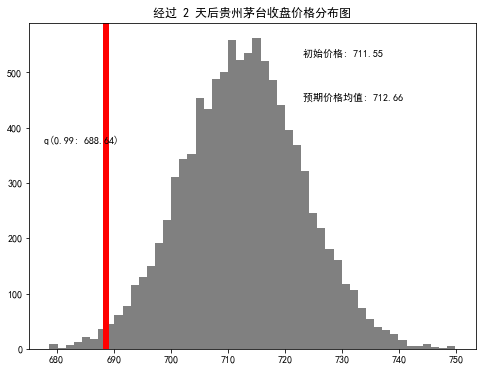

In [6]:
for run in range(runs):
    simulations[run] = monte_carlo(start_price,
      days,mu,sigma)[days-1]
q = np.percentile(simulations,1)
plt.figure(figsize=(8,6))
plt.hist(simulations,bins=50,color='grey')
plt.figtext(0.6,0.8,s="初始价格: %.2f" % start_price)
plt.figtext(0.6,0.7,"预期价格均值: %.2f" %simulations.mean())
plt.figtext(0.15,0.6,"q(0.99: %.2f)" %q)
plt.axvline(x=q,linewidth=6,color="r")
plt.title("经过 %s 天后贵州茅台收盘价格分布图" %days,weight="bold")
plt.show()

In [7]:
from time import time
np.random.seed(2018)
t01=time()
S01=711.55
T1=1.0
r1=0.05
sigma1=rets.std()
M1=60
dt=T1/M1
I=250000
S2=np.zeros((M1+1,I))
S2[0]=S01
for t in range(1,M1+1):
    z=np.random.standard_normal(I)
    S2[t]=S2[t-1]*np.exp((r1-0.5*sigma1**2)*dt+
          sigma1*np.sqrt(dt)*z)
s_m=np.sum(S2[-1])/I
tnp1=time()-t01
print("经过250000次模拟，得出1年后贵州茅台的预期"
      "平均收盘价为{:.2f}".format(s_m))

经过250000次模拟，得出1年后贵州茅台的预期平均收盘价为748.04


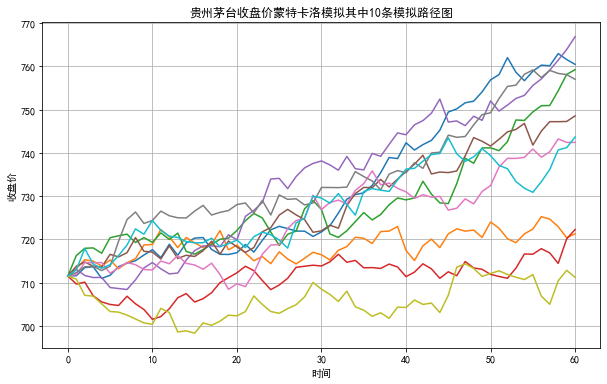

In [8]:
plt.figure(figsize=(10,6))
plt.plot(S2[:,:10])
plt.grid(True)
plt.title('贵州茅台收盘价蒙特卡洛模拟其中10条模拟路径图')
plt.xlabel('时间')
plt.ylabel('收盘价')
plt.show()

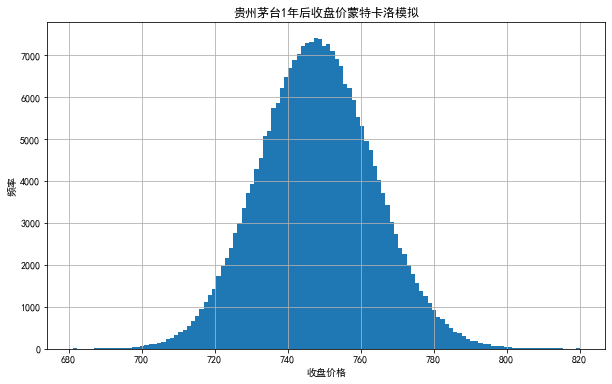

In [9]:
plt.figure(figsize=(10,6))
plt.hist(S2[-1], bins=120)
plt.grid(True)
plt.xlabel('收盘价格')
plt.ylabel('频率')
plt.title('贵州茅台1年后收盘价蒙特卡洛模拟')
plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


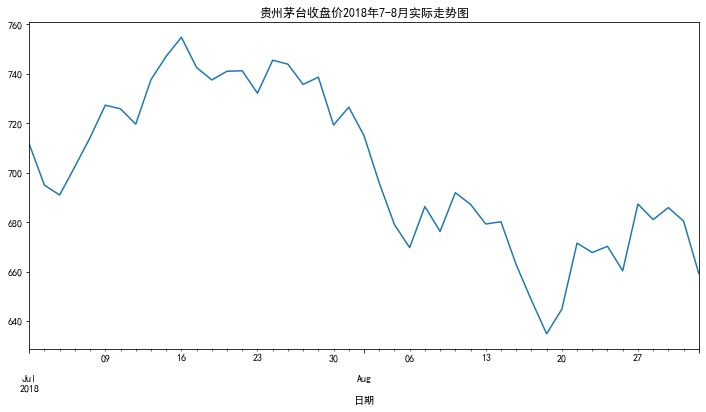

In [11]:
#画出贵州茅台收盘价的走势
sh=ts.get_k_data(code='600519',start='2018-07-01',end='2018-09-01',
             ktype='D',autype='qfq')
sh.index=pd.to_datetime(sh.date)  #将数据列表中第0列‘date'设置为索引
sh['close'].plot(figsize=(12,6))
plt.title('贵州茅台收盘价2018年7-8月实际走势图')
plt.xlabel('日期')
plt.show()